## Using pandas on the MovieLens dataset

To show pandas in a more "applied" sense, let's use it to answer some questions about the [MovieLens](http://www.grouplens.org/datasets/movielens/) dataset. Recall that we've already read our data into DataFrames and merged it.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [4]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=u_cols)

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=r_cols)

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='ISO-8859-1')

# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)

**What are the 25 most rated movies?**

In [5]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]
most_rated

title
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Fu

There's a lot going on in the code above, but it's very idomatic. We're splitting the DataFrame into groups by movie title and applying the `size` method to get the count of records in each group. Then we order our results in descending order and limit the output to the top 25 using Python's slicing syntax.

In SQL, this would be equivalent to:

    SELECT title, count(1)
    FROM lens
    GROUP BY title
    ORDER BY 2 DESC
    LIMIT 25;

Alternatively, pandas has a nifty `value_counts` method - yes, this is simpler - the goal above was to show a basic `groupby` example.

In [8]:
lens.title.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to the Future (

**Which movies are most highly rated?**

In [12]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean,np.median]})
# groupby: Create groups on a specific column, i.e. all with same title
# agg: Within each group, perform some operation on all elements of a column (rating).
# Here, two operations are applied, (added one)
movie_stats.head()

rating                 
                            size      mean median
title                                            
'Til There Was You (1997)      9  2.333333    2.0
1-900 (1994)                   5  2.600000    3.0
101 Dalmatians (1996)        109  2.908257    3.0
12 Angry Men (1957)          125  4.344000    4.0
187 (1997)                    41  3.024390    3.0

We can use the `agg` method to pass a dictionary specifying the columns to aggregate (as keys) and a list of functions we'd like to apply.

Let's sort the resulting DataFrame so that we can see which movies have the highest average score.

In [13]:
# sort by rating average
movie_stats.sort_values(by=[('rating', 'mean')], ascending=False).head()

rating            
                                             size mean median
title                                                        
They Made Me a Criminal (1939)                  1  5.0    5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0    5.0
Saint of Fort Washington, The (1993)            2  5.0    5.0
Someone Else's America (1995)                   1  5.0    5.0
Star Kid (1997)                                 3  5.0    5.0

Because our columns are now a [MultiIndex](http://pandas.pydata.org/pandas-docs/stable/indexing.html#hierarchical-indexing-multiindex), we need to pass in a tuple specifying how to sort.

The above movies are rated so rarely that we can't count them as quality films. Let's only look at movies that have been rated at least 100 times.

In [19]:
atleast_100 = movie_stats['rating']['size'] >= 100
atleast_100 # Generates a BOOL pandes series
# NOTE THAT THE DF IS NOW MULTI-INDEX!!!

title
'Til There Was You (1997)                                   False
1-900 (1994)                                                False
101 Dalmatians (1996)                                        True
12 Angry Men (1957)                                          True
187 (1997)                                                  False
2 Days in the Valley (1996)                                 False
20,000 Leagues Under the Sea (1954)                         False
2001: A Space Odyssey (1968)                                 True
3 Ninjas: High Noon At Mega Mountain (1998)                 False
39 Steps, The (1935)                                        False
8 1/2 (1963)                                                False
8 Heads in a Duffel Bag (1997)                              False
8 Seconds (1994)                                            False
A Chef in Love (1996)                                       False
Above the Rim (1994)                                        False
Abso

In [20]:
movie_stats[atleast_100].sort_values(by=[('rating', 'mean')], ascending=False)[:15]

rating                 
                                         size      mean median
title                                                         
Close Shave, A (1995)                     112  4.491071    5.0
Schindler's List (1993)                   298  4.466443    5.0
Wrong Trousers, The (1993)                118  4.466102    5.0
Casablanca (1942)                         243  4.456790    5.0
Shawshank Redemption, The (1994)          283  4.445230    5.0
Rear Window (1954)                        209  4.387560    5.0
Usual Suspects, The (1995)                267  4.385768    5.0
Star Wars (1977)                          583  4.358491    5.0
12 Angry Men (1957)                       125  4.344000    4.0
Citizen Kane (1941)                       198  4.292929    5.0
To Kill a Mockingbird (1962)              219  4.292237    4.0
One Flew Over the Cuckoo's Nest (1975)    264  4.291667    4.0
Silence of the Lambs, The (1991)          390  4.289744    4.0
North by Northwest (1959)                 179  4.284916    4.0
Godfather, The (1972)                     413  4.283293    5.0

Those results look realistic.  Notice that we used boolean indexing to filter our `movie_stats` frame.

We broke this question down into many parts, so here's the Python needed to get the 15 movies with the highest average rating, requiring that they had at least 100 ratings:

```python
    movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
    atleast_100 = movie_stats['rating'].size >= 100
    movie_stats[atleast_100].sort([('rating', 'mean')], ascending=False)[:15]
```

The SQL equivalent would be:

    SELECT title, COUNT(1) size, AVG(rating) mean
    FROM lens
    GROUP BY title
    HAVING COUNT(1) >= 100
    ORDER BY 3 DESC
    LIMIT 15;

**Limiting our population going forward**

Going forward, let's only look at the 50 most rated movies. Let's make a Series of movies that meet this threshold so we can use it for filtering later.

In [22]:
most_50 = lens.groupby('movie_id').size().sort_values(ascending=False)[:50]
# Slicing :50

The SQL to match this would be:

    CREATE TABLE most_50 AS (
        SELECT movie_id, COUNT(1)
        FROM lens
        GROUP BY movie_id
        ORDER BY 2 DESC
        LIMIT 50
    );
    
This table would then allow us to use EXISTS, IN, or JOIN whenever we wanted to filter our results. Here's an example using EXISTS:

    SELECT *
    FROM lens
    WHERE EXISTS (SELECT 1 FROM most_50 WHERE lens.movie_id = most_50.movie_id);

**Which movies are most controversial amongst different ages?**

Let's look at how these movies are viewed across different age groups. First, let's look at how age is distributed amongst our users.

In [23]:
users.age.head()

0    24
1    53
2    23
3    24
4    33
Name: age, dtype: int64

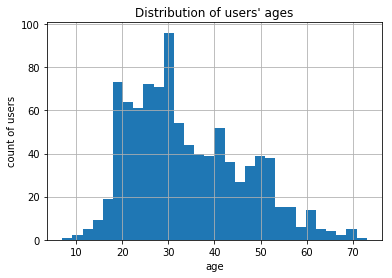

In [24]:
users.age.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

pandas' integration with [matplotlib](http://matplotlib.org/index.html) makes basic graphing of Series/DataFrames trivial.  In this case, just call `hist` on the column to produce a histogram.  We can also use [matplotlib.pyplot](http://matplotlib.org/users/pyplot_tutorial.html) to customize our graph a bit (always label your axes).

**Binning our users**

I don't think it'd be very useful to compare individual ages - let's bin our users into age groups using `pandas.cut`.

In [25]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,60,60-69
397,21,20-29
459,33,30-39
524,30,30-39
782,23,20-29
995,29,20-29
1229,26,20-29
1664,31,30-39
1942,24,20-29
2270,32,30-39


`pandas.cut` allows you to bin numeric data. In the above lines, we first created labels to name our bins, then split our users into eight bins of ten years (0-9, 10-19, 20-29, etc.). Our use of `right=False` told the function that we wanted the bins to be *exclusive* of the max age in the bin (e.g. a 30 year old user gets the 30s label).

Now we can now compare ratings across age groups.

In [28]:
this_df = lens.groupby('age_group').agg({'rating': [np.size, np.mean]})
this_df

rating          
            size      mean
age_group                 
0-9           43  3.767442
10-19       8181  3.486126
20-29      39535  3.467333
30-39      25696  3.554444
40-49      15021  3.591772
50-59       8704  3.635800
60-69       2623  3.648875
70-79        197  3.649746

Young users seem a bit more critical than other age groups. Let's look at how the 50 most rated movies are viewed across each age group. We can use the `most_50` Series we created earlier for filtering.

In [54]:
this_df['rating']['mean'].plot()

KeyError: 'rating'

In [55]:
lens.set_index('movie_id', inplace=True)

In [56]:
by_age = lens.ix[most_50.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                 age_group
Air Force One (1997)  10-19        3.647059
                      20-29        3.666667
                      30-39        3.570000
                      40-49        3.555556
                      50-59        3.750000
                      60-69        3.666667
                      70-79        3.666667
Alien (1979)          10-19        4.111111
                      20-29        4.026087
                      30-39        4.103448
                      40-49        3.833333
                      50-59        4.272727
                      60-69        3.500000
                      70-79        4.000000
Aliens (1986)         10-19        4.050000
Name: rating, dtype: float64

Notice that both the title and age group are indexes here, with the average rating value being a Series. This is going to produce a really long list of values.

Wouldn't it be nice to see the data as a table? Each title as a row, each age group as a column, and the average rating in each cell.

Behold! The magic of `unstack`!

In [57]:
this_df = by_age.rating.mean().unstack(1).fillna(0)[10:20]

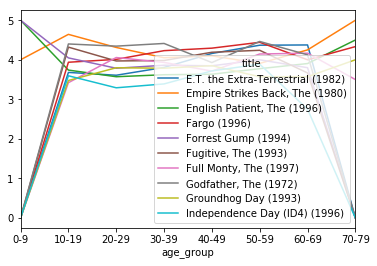

In [58]:
this_df.transpose().plot()
#plot()

`unstack`, well, unstacks the specified level of a [MultiIndex](http://pandas.pydata.org/pandas-docs/stable/indexing.html#hierarchical-indexing-multiindex) (by default, `groupby` turns the grouped field into an index - since we grouped by two fields, it became a MultiIndex). We unstacked the second index (remember that Python uses 0-based indexes), and then filled in NULL values with 0.

If we had used:
```python
    by_age.rating.mean().unstack(0).fillna(0)
```
We would have had our age groups as rows and movie titles as columns.

**Which movies do men and women most disagree on?**

*Wes McKinney basically went through the exact same question in his book. It's a good, yet simple example of pivot_table. McKinney's book is the go-to text for pandas: [book here](http://www.amazon.com/gp/product/1449319793/ref=as_li_tl?ie=UTF8&camp=1789&creative=390957&creativeASIN=1449319793&linkCode=as2&tag=gjreda-20&linkId=MCGW4C4NOBRVV5OC).*

Think about how you'd have to do this in SQL for a second. You'd have to use a combination of IF/CASE statements with aggregate functions in order to pivot your dataset. Your query would look something like this:

    SELECT title, AVG(IF(sex = 'F', rating, NULL)), AVG(IF(sex = 'M', rating, NULL))
    FROM lens
    GROUP BY title;
    
Imagine how annoying it'd be if you had to do this on more than two columns.
    
DataFrame's have a *pivot_table* method that makes these kinds of operations much easier (and less verbose).

In [59]:
lens.reset_index('movie_id', inplace=True)

In [60]:
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [61]:
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [62]:
pivoted.reset_index('movie_id', inplace=True)
pivoted.head()

sex,movie_id,F,M,diff
title,,,,
Toy Story (1995),1,3.789916,3.909910,0.119994
GoldenEye (1995),2,3.368421,3.178571,-0.189850
Four Rooms (1995),3,2.687500,3.108108,0.420608
Get Shorty (1995),4,3.400000,3.591463,0.191463
Copycat (1995),5,3.772727,3.140625,-0.632102


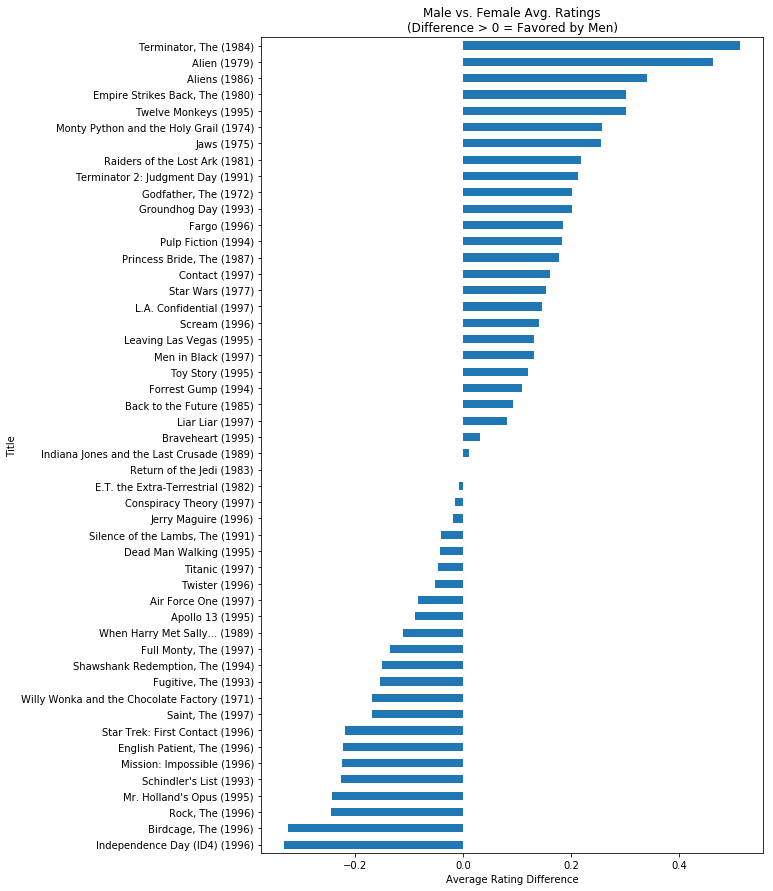

In [64]:
disagreements = pivoted[pivoted.movie_id.isin(most_50.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference')
plt.show()

Of course men like Terminator more than women. Independence Day though? Really?

### Additional Resources:

* [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [Introduction to pandas](http://nbviewer.ipython.org/urls/gist.github.com/fonnesbeck/5850375/raw/c18cfcd9580d382cb6d14e4708aab33a0916ff3e/1.+Introduction+to+Pandas.ipynb) by [Chris Fonnesbeck](https://twitter.com/fonnesbeck)
* [pandas videos from PyCon](http://pyvideo.org/search?models=videos.video&q=pandas)
* [pandas and Python top 10](http://manishamde.github.io/blog/2013/03/07/pandas-and-python-top-10/)
* [pandasql](http://blog.yhathq.com/posts/pandasql-sql-for-pandas-dataframes.html)
* [Practical pandas by Tom Augspurger (one of the pandas developers)](http://tomaugspurger.github.io/categories/pandas.html)
    * [Video](https://www.youtube.com/watch?v=otCriSKVV_8) from Tom's pandas tutorial at PyData Seattle 2015